<u>**MACHINE LEARNING EXERCISE: LINEAR REGRESSION**</u>
# ADVERTISING

Linear Regression model is one of the simplest predictive model in Machine Learning. It predicts by deriving a straight-line formula based on the data fit on it. But as simple as it is, Linear Regression can still be an effective model such as in use-cases like this.

**About**
* This dataset was uploaded in Kaggle. It contains data on the budget allocated for TV, radio and newspaper advertisements with the resulting sales.

**Target Variable**
* (int) Sales

**Predictors**
1. (int) TV - Budget of advertisements in TV
1. (int) Radio - Budget of advertisements in radio
1. (int) Newspaper - Budget of advertisements in newspaper

**Sources**
* https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4
* https://www.kaggle.com/sazid28/advertising.csv

## Import Libraries

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Load and Explore the Dataset

In [2]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
### Get summary of statistics of the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Exploratory Data Analysis

In [4]:
### Get Correlation of features
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


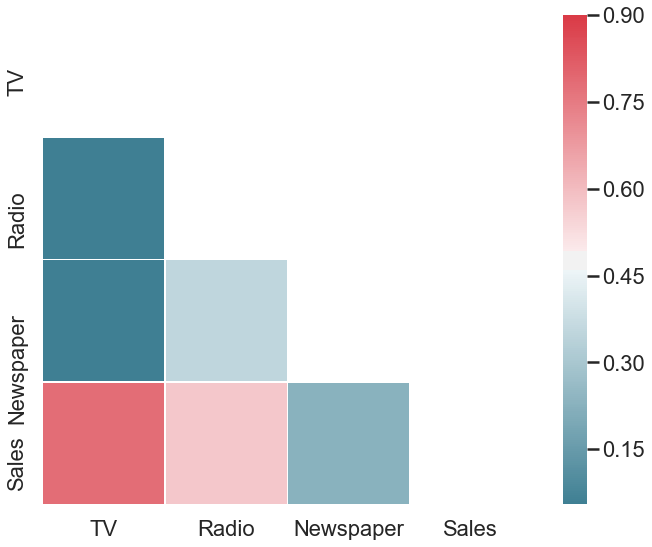

In [5]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Since *Sales* is our target variable, we should identify which variable correlates the most with *Sales*. 

As we can see, *TV* has the highest correlation with *Sales*. 

Let's visualize the relationship of variables using scatterplots.

Text(0.5, 1.0, 'Sales vs Radio')

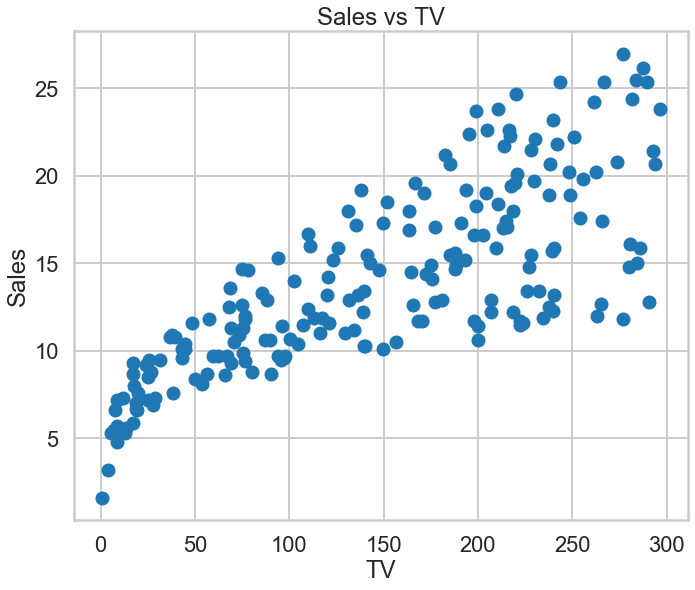

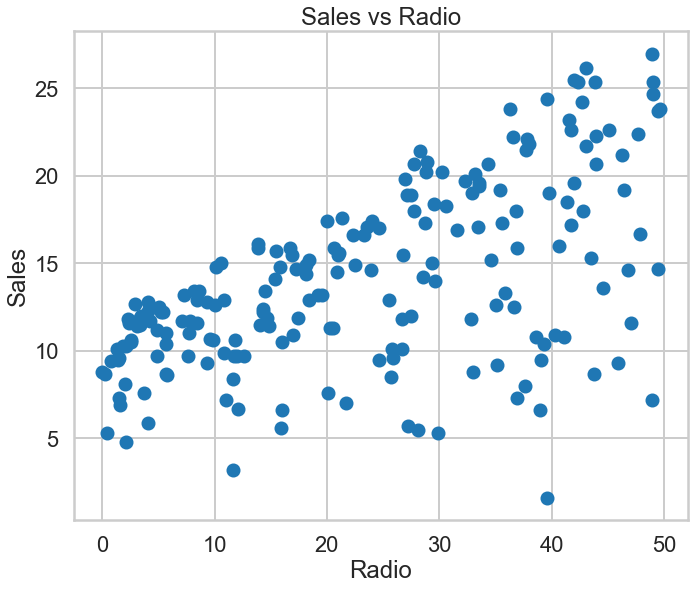

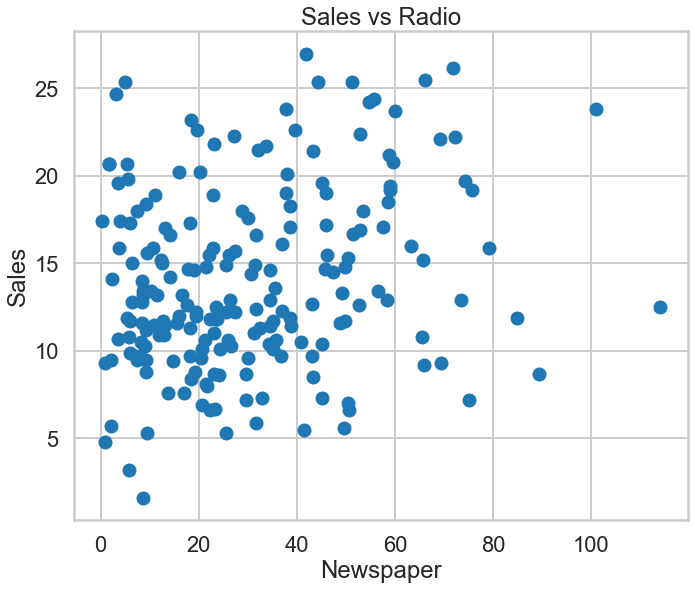

In [6]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

Backing up the findings using correlation, the relationship between *Sales* and *TV* is more linear.

Now, let's look at the relationship between the predictors.

Text(0.5, 1.0, 'Radio vs Radio')

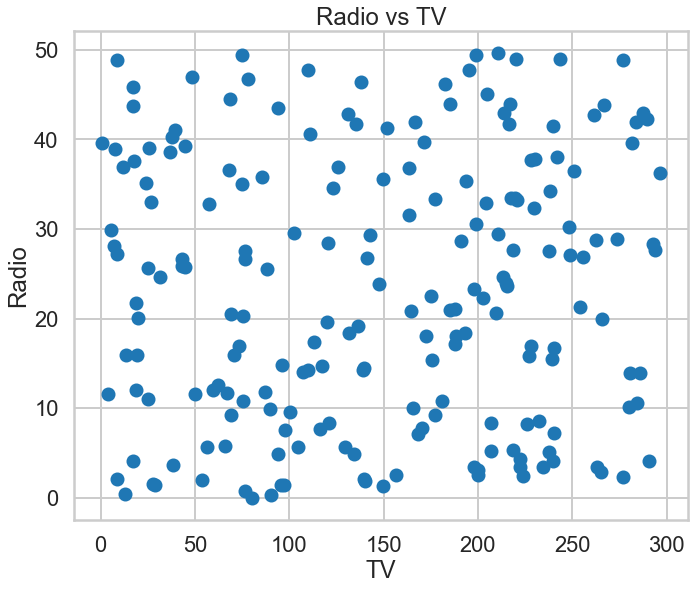

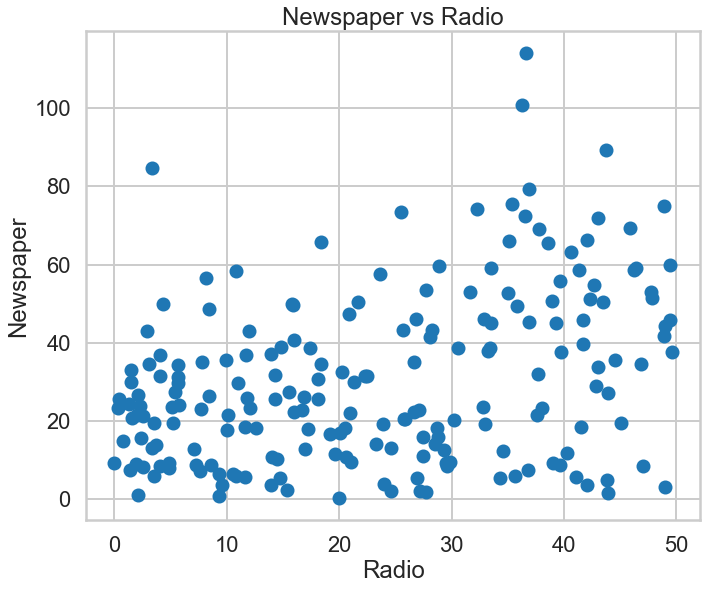

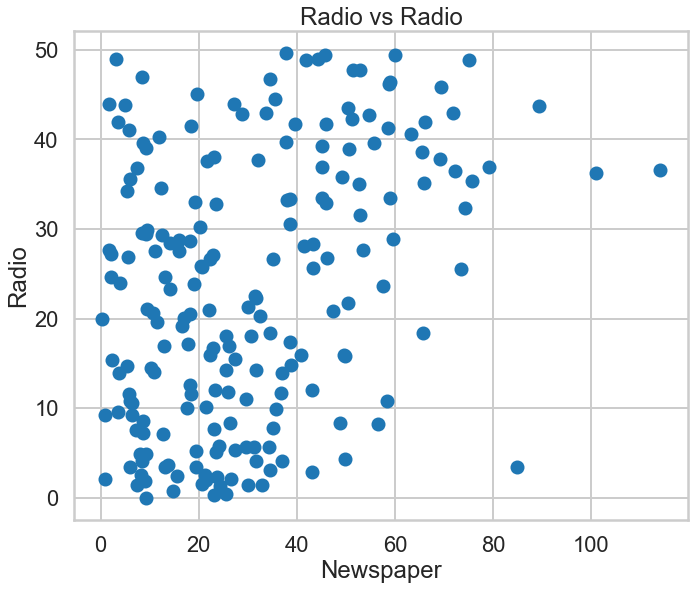

In [7]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable *TV* will more likely give better prediction of *Sales* because of the high correlation and linearity of the two.

## Prep the Data for Modelling

In [8]:
### Separate the predictor and the target variable 
x = df.drop("Sales", axis = 1)
y = df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [9]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


In [10]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

## Build then Evaluate the Models

### Linear Regression

In [11]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

#### Using all predictors
The results of this model that uses all of the predictor variable will be our basis on the next models.

R2: 0.8843196200174288
MAE: 1.402312498938508
MSE: 2.8800237300941944
RMSE: 1.6970632663793634
Cross-Val Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Cross-Val Mean: 0.8853562237979616


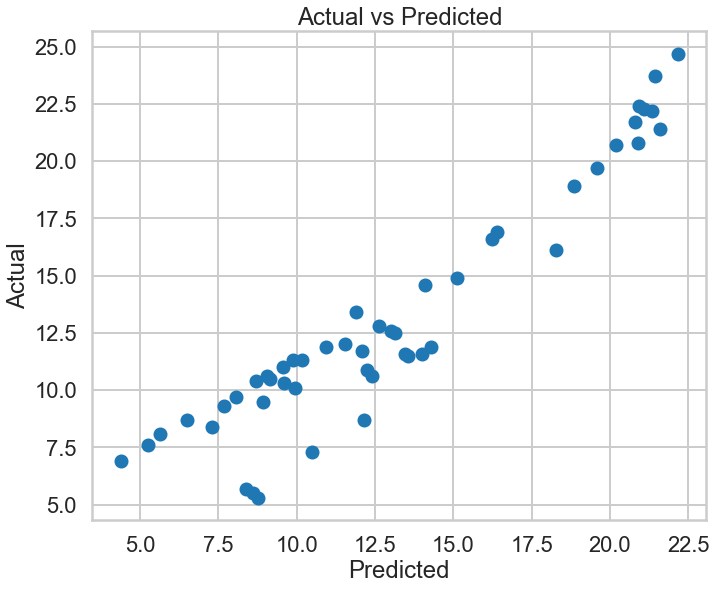

In [12]:
### Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_all_results, ignore_index=True)

#### Using only *TV* as predictor
Since *TV* shows more correlation and linearity with our target variable, let's try predicting *Sales* using only this variable.

R2: 0.4310048090294476
MAE: 2.2737705943708724
MSE: 9.179298570399792
RMSE: 3.029735726164873
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


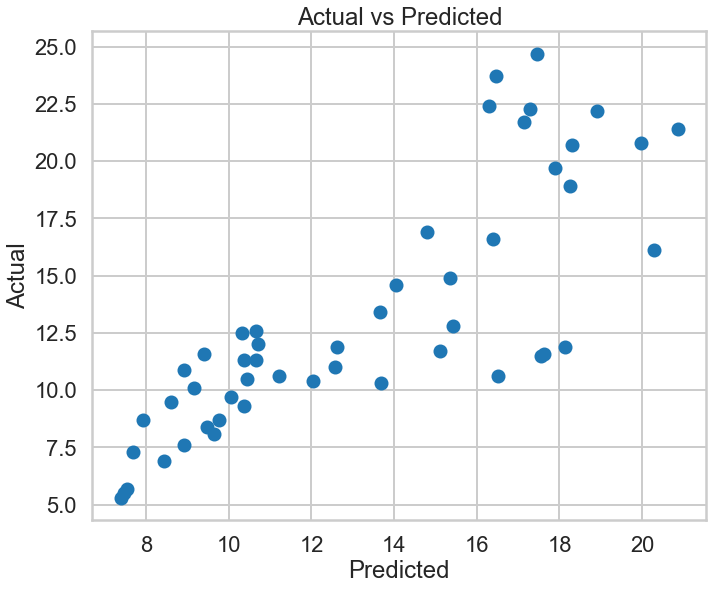

In [13]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TV_results, ignore_index=True)

Eventhough *TV* is more correlated and linear on Sales, this model does not perform well compared to the model that uses all predictors.

#### Using *TV* and *Radio* as predictors
The top 2 predictor variables based on the EDA above are *TV* and *Radio*, so let's see if the combination of these variables makes a better model.

R2: 0.8850764340201793
MAE: 1.3886802126434383
MSE: 2.8539947557761023
RMSE: 1.6893770318599997
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


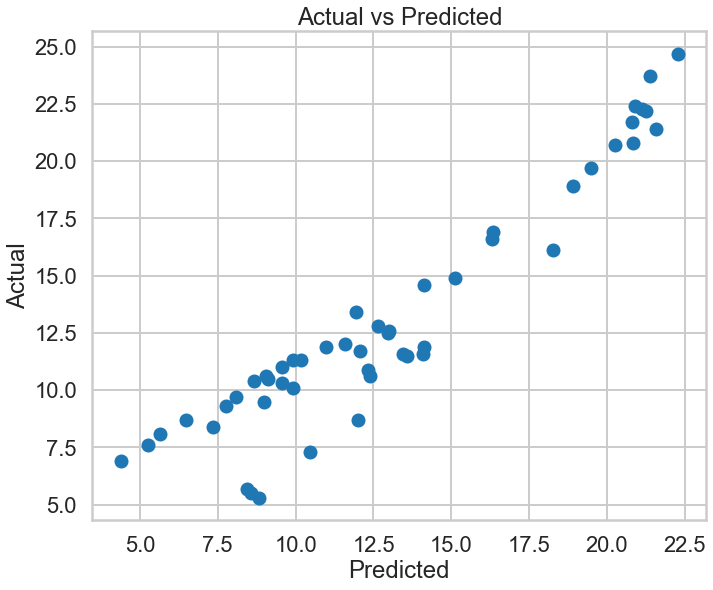

In [14]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TVR_results, ignore_index=True)

This model is slightly better than the model that uses all of the predictor variables.

## Conclusion

In [15]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,88.431962,1.402312,2.880024,1.697063,88.535622
TV,43.100481,2.273771,9.179299,3.029736,56.869659
TV & Radio,88.507643,1.388680,2.853995,1.689377,88.696705


**The Linear Regression model that uses the predictors *TV* and *Radio* performs the best out of all the models tried.**

These results mean that advertising on *TV* and *Radio* contribute the most in *Sales*, and  *Newspaper* advertisements have little effect in *Sales*. 

Based on these findings, it is recommended that the marketer or the business owner shall **allocate more budget on *TV* and *Radio* advertisements rather than *Newspaper***.

## Special Thanks
* [FTW Foundation](https://www.ftwfoundation.org/)